In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
print(train_images.shape)
len(train_labels)
#train_labels

(60000, 28, 28)


60000

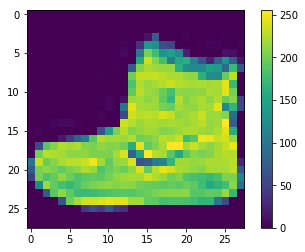

In [5]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0


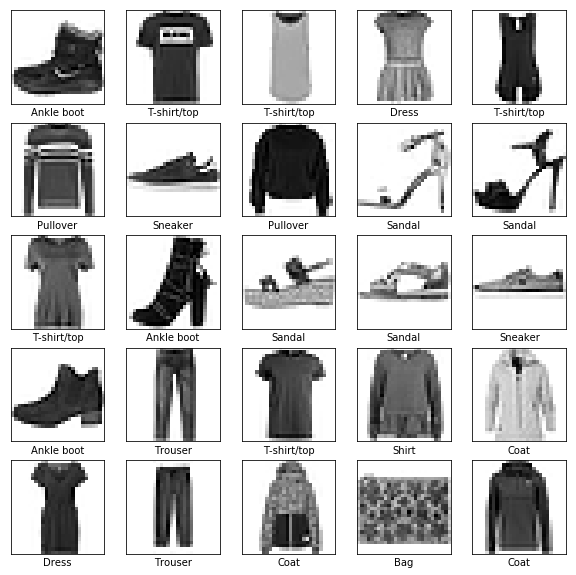

In [7]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 1.1008 - acc: 0.6648
Epoch 2/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.6461 - acc: 0.7662
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.5687 - acc: 0.7966
Epoch 4/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.5253 - acc: 0.8145
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.4967 - acc: 0.8235


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
predictions[0]

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.8152


array([  1.29721082e-06,   5.83041349e-08,   4.34163485e-06,
         4.04607317e-06,   1.55051403e-05,   1.82273760e-01,
         7.87106273e-06,   3.51168692e-01,   8.07497092e-03,
         4.58449394e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])
test_labels[0]

9

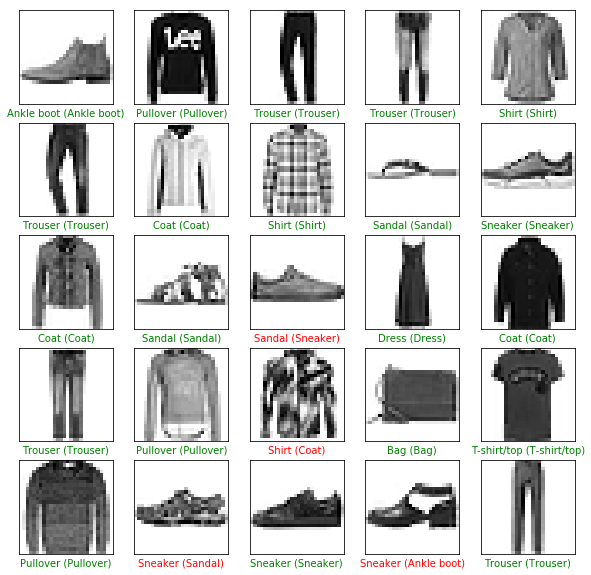

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],class_names[true_label]), color=color)

In [47]:
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions = model.predict(img)
print(predictions)
prediction = predictions[0]
np.argmax(prediction)

(28, 28)
(1, 28, 28)
[[  1.29721138e-06   5.83041633e-08   4.34163712e-06   4.04607135e-06
    1.55051621e-05   1.82273805e-01   7.87108183e-06   3.51168573e-01
    8.07497092e-03   4.58449602e-01]]


9